In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

# Part 1: *[title here]*

A university's admission is related to the different aspects of the society, and often becomes a reflection on societal's values and dynamic. For this part of the assignment, we will be working with **UC Berkeley's 1973 graduate admission** dataset to further explore how gender (recorded binary during 1973: Female and Male) plays a role in admission.

Suppose you are an investigator from the State of California examining admissions in the UC system schools. Before diving into the dataset, consider your direct observations around campus or in classroom to understand the shared reality.

<br/>

<hr style="border: 1px solid #fdb515;" />

## *Analysis Portion*

<!-- BEGIN QUESTION -->
**Question 1:**
Based on your own experiences/observations on campus, can you suggest any trends in admission rates across different gender identities? How reliable are these observations in reflecting actual admission rates, and what are the potential limitations of using sensory information to gauge this? Answer will vary.

- Note: When discussing gender, please be considerate of the diversity in gender identities. Your insights should reflect personal observations and are subjective.

*Your Answer Here*

In [4]:
# Instructor Solution: 

# Answer may vary. 
# Students may talk about limited perspective, biased sample size, and changing trends.

<!--- END QUESTION -->


<!-- BEGIN QUESTION -->
**Question 2:** In what ways can we understand reality beyond our sense? What is a potential harm or biases in data collection? Identify at least two potential systemic uncertainties that might impact the fairness of the admissions process. Discuss how these systemic uncertainties could originate and propose methods that could be used to mitigate these biases in future admissions cycles.
* Note 1: Make sure the two potential systemic uncertainties you address is not similar but comes from different dimensions/ perspectives. 
* Note 2: In few weeks we will talk more about systemic uncertainties and biases!

*Your Answer Here*

In [5]:
# Instructor Solution: 

# Answer may vary. 
# For "what ways can we understand reality", they can say something along the lines of...
    # Data Collection and Analysis, Statistical Analysis, Qualitative Research
# For "Two potential systemic uncertainties":
    # Selection Bias, Measurement Bias
    # Strucrtural inequality, Implicit bias

<!-- End QUESTION -->

Now, let's load our dataset `berkeley.csv` below.

In [2]:
berkeley = pd.read_csv("berkeley.csv")
berkeley.head(10)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


In [7]:
# Instructor Note / TODO: 
# Make sure the csv is in the same file path as this notebook. 
# If not, we will have tell them the path to the csv.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 3**: Create a new table `admission_rate_per_gender`by grouping the original dataset by gender. Your table should include aggregated data frame with three columns, `Gender`, `total_applications`, and `accepted_applicatns`, to calculate the acceptance rate in the next question.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Hint 1: There should be only two rows for the table.</i> 
- <i>Hint 2: In Data C8, we learned the method `group`. Pandas have similar method called `groupby`. You can find the documentation for this method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).</i>
- <i>Hint 3: If you `.groupby` a column, that becomes the index. Consider using `reset_index()` for resetting the index.</i>
- <i>Hint 4: Panda's `.agg` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)) and `lambda` can be helpful for this question.</i>

</details>


In [ ]:
admission_per_gender = ...

admission_per_gender.head()

In [3]:
# Instructor Solution:

admission_per_gender = berkeley.groupby('Gender').agg(
    total_applications=('Admission', 'size'), # Calculate the total number of applications per gender
    accepted_applications=('Admission', lambda x: (x == 'Accepted').sum()) # Calculate the number of accepted applications per gender
    ).reset_index() # Reset the index to make Gender a regular column

admission_per_gender.head()

,Gender,total_applications,accepted_applications
0,F,4321,1494
1,M,8442,3738


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 4**: Using the table you created in **Question 3** that includes the total and accepted applications for each gender, calculate the acceptance rate for each gender and create a new table called `acceptance_rate_tbl` with two column `Gender` and `Acceptance_Rate`. For clarification, the acceptance rate should be count of accepted divided by total count of application.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- *Hint 1: Use the `.assign` method ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)) to create the new column for the admission rate.*

    Here's an example how to use the `.assign` method
    ```js
    new_dataframe = old_dataframe.assign( New_Column_Name = lambda x: x['Column1'] / x['Column2'])

</details>


In [ ]:
acceptance_rate_tbl = ... 

acceptance_rate_tbl.head()

In [5]:
# Instructor Solution:
admission_rate_tbl = admission_per_gender.assign( 
    Admission_Rate=lambda x: x['accepted_applications'] / x['total_applications'] # Calculate admission rate by dividing the number of accepted applications by the total number of applications
)[['Gender', 'Admission_Rate']]  # Selecting only the required columns

admission_rate_tbl.head()

,Gender,Admission_Rate
0,F,0.345753
1,M,0.442786


**Question 5**: We want to plot the table we just constructed, but we will first need to calculate the error bars. We will do so by calculating their variance based on a Bernoulli's distribution. The variance of a Bernoulli's distribution is: </i> $$ Var(X)=p(1−p) $$ 

<details open>

<summary><i>Click here for hint(s)</i></summary>

- *The probability `p` should be represented by the admission rate*
- *Calculate the error bar for each gender*

</details>

In [ ]:
rate_f = ...
variance_f = ...

rate_m = ...
variance_m = ...

variances_5 = [variance_f, variance_m]
variances_5

In [15]:
# Instructor Solution:

rate_f = admission_rate_tbl.loc[0, 'Admission_Rate']
variance_f = rate_f * (1 - rate_f)

rate_m = admission_rate_tbl.loc[1, 'Admission_Rate']
variance_m = rate_m * (1 - rate_m)

variances_5 = [variance_f, variance_m]
variances_5

[0.22620795487514592, 0.2467265661741046]

**Question 6**: Let's append the variances we just calculated to the `admission_rate_tbl`. Title the new column `Admission_Variance`.

In [ ]:
admission_rate_tbl['Admission_Variance'] = ...

admission_rate_tbl.head()

In [16]:
admission_rate_tbl['Admission_Variance'] = variances_5

admission_rate_tbl.head()

,Gender,Admission_Rate,Admission_Variance
0,F,0.345753,0.226208
1,M,0.442786,0.246727


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 7**: Using the updated `admission_rate_tbl` constructed in **Question 6**, create a `bar` plot showing each gender's admission rate. Documentation to plot bar graph in seaborn is linked [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).
* For this question, you can use any Python visualization method, including `seaborn` or `matplotlib` imported above. 
* Don't forget about the error bars!

In [ ]:
...

<Axes: xlabel='Gender', ylabel='Admission_Rate'>

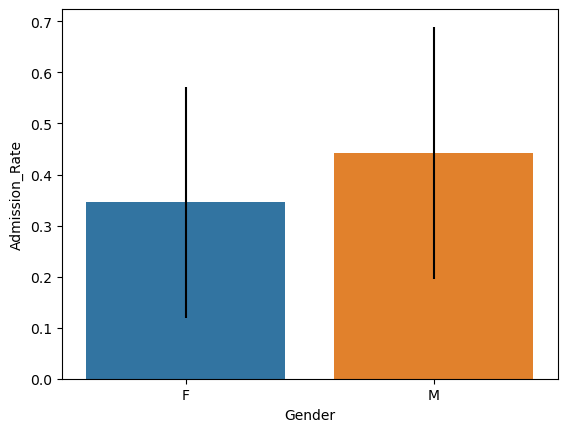

In [10]:
# Instructor Solution:

sns.barplot(data=admission_rate_tbl, x = "Gender", y = "Admission_Rate", yerr = admission_rate_tbl["Admission_Variance"])

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 8**: Analyze the graph displayed above. Based on the data presented try to discuss:
1. Any observable trends or differences in admission rates between male and female applicants at UC Berkeley during 1973.
2. How the biases identified in **Question 2** might influence your interpretation of these trends or differences. What might these trends imply about UC Berkeley's admissions process in that year?
3. How might someone interpret the error bars we calculated and plotted? What do they indicate about the admissions rates by gender?

*Note: Your interpretation should focus on connecting the visual data from the graph to possible conclusions about UC Berkeley's admission practices. Answer may vary.*

*Your Answer Here*

In [20]:
# Instructor Solution:

# Students' answers may vary.
# We have guided the students to believe the false narrative that male is more likely to be accepted.
# Error bars may give away that there is no significant difference here...

In [12]:
admission_per_gender.head()

,Gender,total_applications,accepted_applications
0,F,4321,1494
1,M,8442,3738


**Question 9**: `admission_per_gender` has been loaded above for your convenience. Let's add a column with applications that were rejected, per gender. Title the new column `rejected_applications`

In [ ]:
...

admission_per_gender.head()

In [14]:
# Instructor Solution:

rejected_f = admission_per_gender.loc[0, 'total_applications'] - admission_per_gender.loc[0, 'accepted_applications']
rejected_m = admission_per_gender.loc[1, 'total_applications'] - admission_per_gender.loc[1, 'accepted_applications']

admission_per_gender['rejected_applications'] = [rejected_f, rejected_m]
admission_per_gender.head()

,Gender,total_applications,accepted_applications,rejected_applications
0,F,4321,1494,2827
1,M,8442,3738,4704


**Question 10**: Similar to **Question 5**, we want to plot the table we just constructed, but we will first need to calculate the error bars. This time, we will do so by calculating their variances based on a binomial distribution. The variance of a binomial distribution is: </i> $$ Var(X)= np(1−p) $$ 

Afterwards, create a new collumn in the `admission_per_gender` dataframe titled `admissions_variance` using the variances you calculated.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- *`n` should be represnted by the `total_applications`*
- *The probability `p` should be represented by the admission rate*
- *Calculate the error bar for each gender*
- *It may be helpful to reuse some of the variables we calculated in **Question 5**

</details>

In [ ]:
variance_f_times_n = ...
variance_m_times_n = ...

...

admission_per_gender.head()

In [18]:
# Instructor Solution:

variance_f_times_n = variance_f * admission_per_gender.loc[0, 'total_applications']
variance_m_times_n = variance_m * admission_per_gender.loc[1, 'total_applications']

admission_per_gender['admissions_variance'] = [variance_f_times_n, variance_m_times_n]

admission_per_gender.head()

,Gender,total_applications,accepted_applications,rejected_applications,admissions_variance
0,F,4321,1494,2827,977.444573
1,M,8442,3738,4704,2082.865672


**Question 11**: Using our updated `admission_per_gender` table, create two `bar` plots, one that compares the accepted applications per gender, and another comparing the rejected applications per gender. Documentation to plot bar graph in seaborn is linked [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).
* For this question, you can use any Python visualization method, including `seaborn` or `matplotlib` imported above. 
* Don't forget about the error bars!

In [ ]:
...

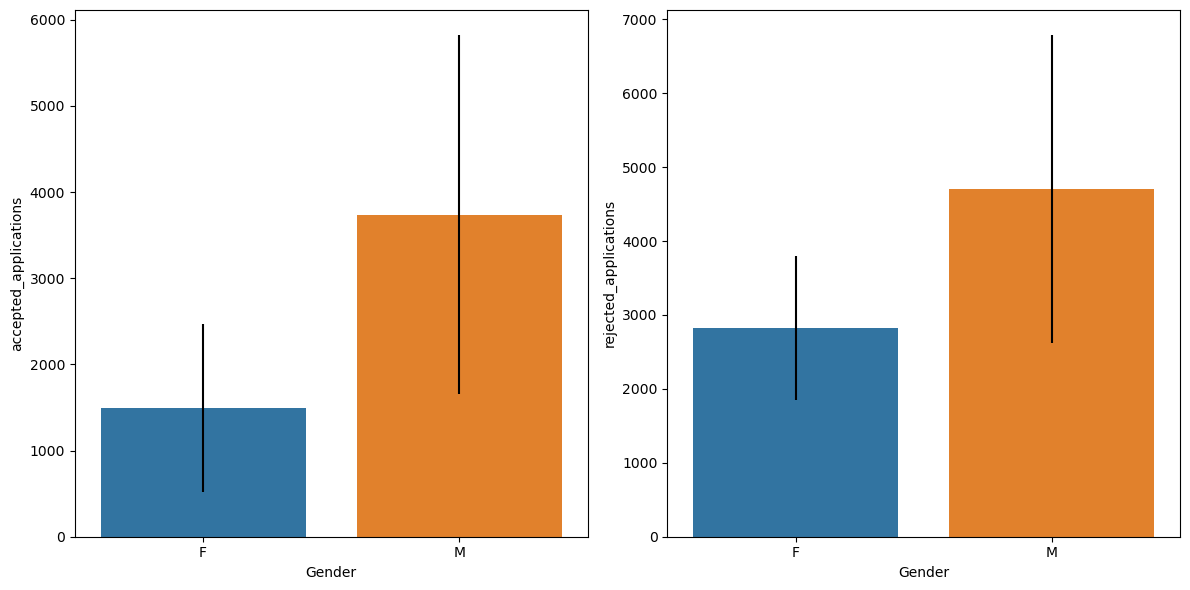

In [24]:
# Instructor Solution:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=admission_per_gender, x = "Gender", y = "accepted_applications", yerr = admission_per_gender["admissions_variance"], ax=axes[0]) 
sns.barplot(data=admission_per_gender, x = "Gender", y = "rejected_applications", yerr = admission_per_gender["admissions_variance"], ax=axes[1]) 

plt.tight_layout()
plt.show()

**Question 12**: Taking a look at the bar plots we just created, what observations can you make about the different proportions in admission trends between male and female applicants?

*Your Answer Here*

In [ ]:
# Instructor Solution:

# Students' answers may vary.
# TODO: Fill in draft answers

<br/>

<hr style="border: 1px solid #fdb515;" />

## *Discussion Portion*

**Question 13**: Based on the findings you made in this notebook, what claims and notes would you make in a report about the admission data? Establish a credence level to your claim and explain why. Consider any biases that may impact the credibility or interpretation of your findings.

*Your Answer Here*

In [ ]:
# Instructor Note/ Solution

# Students' answers may vary.
# Observed trend: Higher admission rate for male applicants compared to female applicants at UC Berkeley in 1973.
# Possible bias: Suggests a bias favoring male applicants in the admissions process.
# Caution warranted: Limited data on other factors like race and socioeconomic status; conclusion should be approached with moderate confidence.
# Further investigation needed: To fully understand underlying reasons behind disparities and ensure fairness in admissions process.


**Question 14**: While working throug the notebook, were there any assumptions you made in interpreting the data? Were there disagreements in the interpretation of the same data?

*Your Answer Here*

In [ ]:
# Instructor Solution:

# Students' answers may vary.
# TODO: Fill in draft answers

**Question 15**: Besides examining admission rates in relation to gender, what other factors would you consider important to explore to fully understand the dynamics of UC Berkeley's admission process? Discuss how these factors could interact with gender or independently affect admission decisions. Answer may vary. 

*Your Answer Here*

In [ ]:
# Instructor Note/ Solution

# Students' answers may vary.
# Answer can be something along the line: 
    # Race/Ethnicity, Socioeconomic Status, Academic Background, Geographic Diversity, etc

**Question 16**: The higher-ups from the state government would like to use your report to make new legislative decisions. Reflect on how your understanding of biases and the conclusions drawn from your data analysis might impact these data-driven decisions. Who would this affect the most? Answer may vary. 

*Your Answer Here*

In [ ]:
# Instructor Note/ Solution

# Students' answers may vary.
# Answer can mention:  
    # Legislative Decisions, Impact on Applicants, Educational Institutions, etc.

End of the assignment! 😄 Great job! We will come back to this story in Part 2 later during the semester. 